In [126]:
import pandas as pd

In [127]:
train=pd.read_csv('train.csv')

In [128]:
holdout=pd.read_csv('test.csv')

In [129]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [130]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [131]:
def func(df,col):
    df=process_missing(df)
    df=process_age(df)
    df=process_fare(df)
    df=process_titles(df)
    df=process_cabin(df)
    df=create_dummies(df,col)
    return df
    
    

In [132]:
col=["Age_categories", "Fare_categories","Title", "Cabin_type", "Sex"]

In [133]:
train=func(train,col)

In [134]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,1,0,1


In [135]:
holdout=func(holdout,col)

In [136]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_Unknown,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,...,0,0,0,0,0,0,0,1,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,...,0,0,0,0,0,0,0,1,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,...,0,0,0,0,0,0,0,1,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,...,0,0,0,0,0,0,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,...,0,0,0,0,0,0,0,1,1,0


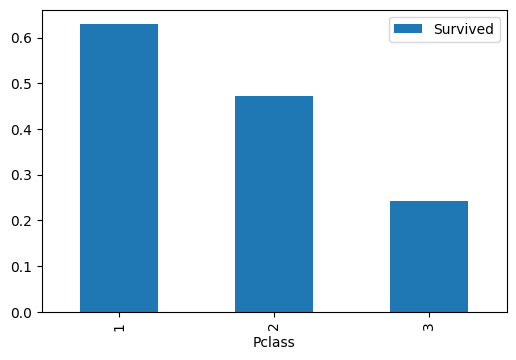

In [137]:
%matplotlib inline
train.pivot_table(index="Pclass",values="Survived").plot.bar()

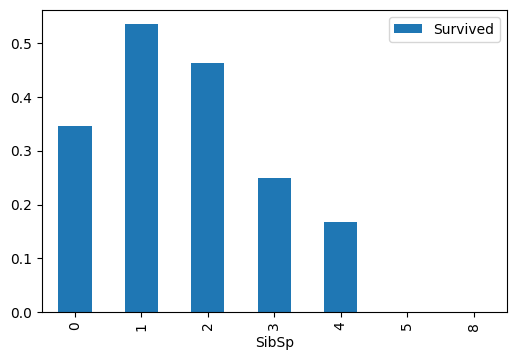

In [138]:
train.pivot_table(index="SibSp",values="Survived").plot.bar()

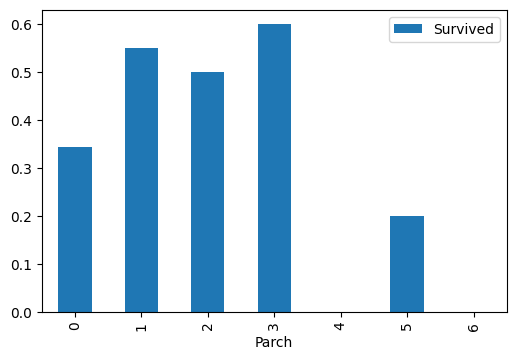

In [139]:
train.pivot_table(index="Parch",values="Survived").plot.bar()

In [140]:
from matplotlib import pyplot as plt

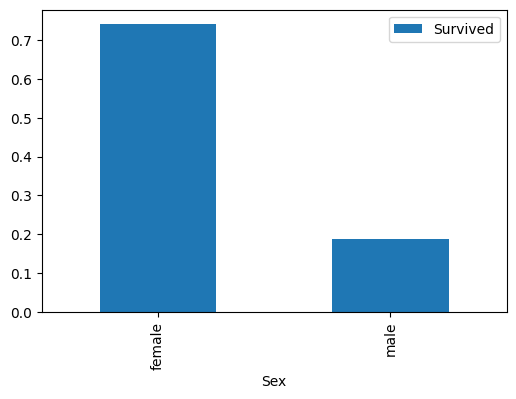

In [141]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()


In [142]:
explore_cols = ["SibSp","Parch","Survived"]
explore = train[explore_cols].copy()



In [143]:
explore['familysize'] = explore[["SibSp","Parch"]].sum(axis=1)


In [144]:
explore['isalone']=explore['familysize'].apply(lambda x : 0 if x>0 else 1)

In [145]:
pivot = explore.pivot_table(index=['isalone'],values="Survived")
pivot


,Survived
isalone,
0,0.505650
1,0.303538


In [146]:
def funca(df):
    explore = df.copy()
    explore['familysize'] = explore[["SibSp","Parch"]].sum(axis=1)
    explore['isalone']=explore['familysize'].apply(lambda x : 0 if x>0 else 1)
    return explore
    

In [147]:
train=funca(train)

In [148]:
holdout=funca(holdout)

In [149]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male,familysize,isalone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,1,0,1


In [150]:
train=train.drop(columns=['Name','Sex','Ticket','Age_categories','Fare_categories','Title',
'Cabin_type','Embarked'])

In [151]:
holdout=holdout.drop(columns=['Name','Sex','Ticket','Age_categories','Fare_categories','Title',
'Cabin_type','Embarked'])

In [152]:
all_X = train.drop(['Survived','PassengerId'],axis=1)
all_y = train['Survived']

In [153]:
all_X.dtypes

Pclass                          int64
Age                           float64
SibSp                           int64
Parch                           int64
Fare                          float64
Age_categories_Missing          uint8
Age_categories_Infant           uint8
Age_categories_Child            uint8
Age_categories_Teenager         uint8
Age_categories_Young Adult      uint8
Age_categories_Adult            uint8
Age_categories_Senior           uint8
Fare_categories_0-12            uint8
Fare_categories_12-50           uint8
Fare_categories_50-100          uint8
Fare_categories_100+            uint8
Title_Master                    uint8
Title_Miss                      uint8
Title_Mr                        uint8
Title_Mrs                       uint8
Title_Officer                   uint8
Title_Royalty                   uint8
Cabin_type_A                    uint8
Cabin_type_B                    uint8
Cabin_type_C                    uint8
Cabin_type_D                    uint8
Cabin_type_E

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [155]:
lr=LogisticRegression()
lr.fit(all_X,all_y)
scores=cross_val_score(lr,all_X,all_y,cv=10)

accuracy_lr=scores.mean()

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/dataquest/s

In [156]:
accuracy_lr

0.821598002496879

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=1)
scores=cross_val_score(knn,all_X,all_y,cv=10)
accuracy_knn=scores.mean()

In [158]:
accuracy_knn

0.701498127340824

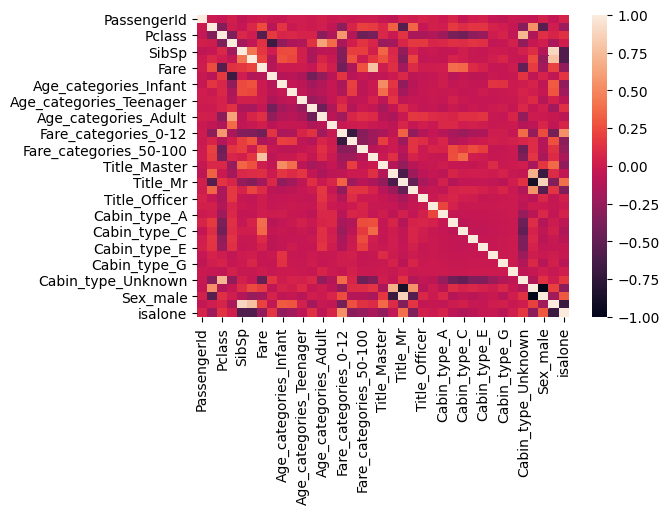

In [159]:
import seaborn as sns
correlations = train.corr()
sns.heatmap(correlations)
plt.show()

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}



knn=KNeighborsClassifier(n_neighbors=1)
gnn=GridSearchCV(knn,hyperparameters,cv=10)

gnn.fit(all_X,all_y)
best_params=gnn.best_params_
best_score=gnn.best_score_

In [161]:
best_score

0.7789013732833958

In [162]:
from sklearn.ensemble import RandomForestClassifier


rnn = RandomForestClassifier(random_state=1)
scores=cross_val_score(rnn,all_X,all_y,cv=10)
accuracy_rf=scores.mean()

In [163]:
accuracy_rf

0.8272034956304619

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}
rnn = RandomForestClassifier(random_state=1)
# scores=cross_val_score(rnn,all_X,all_y,cv=10)
# accuracy_rf=scores.mean()


gnn=GridSearchCV(rnn,param_grid=hyperparameters,cv=10)

gnn.fit(all_X,all_y)
best_params=gnn.best_params_
best_score=gnn.best_score_

In [165]:
best_score

0.8395505617977529